# Principal Component Analysis

## import library

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [193]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

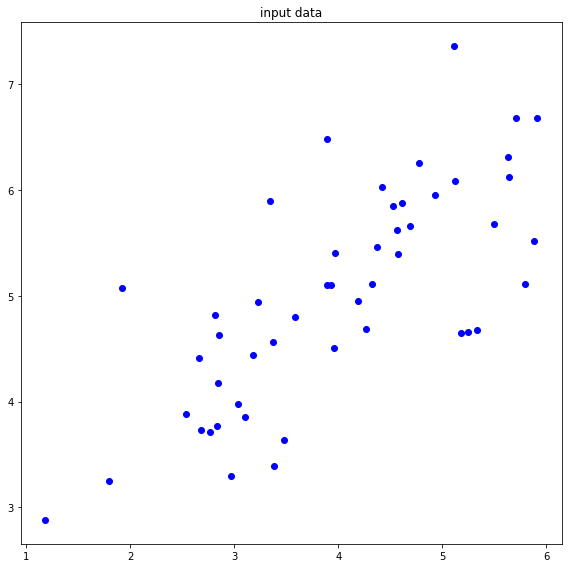

In [194]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [195]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #열을 기준을 m, sigma를 구한다.
    x = feature[:,0]
    y = feature[:,1]
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_sigma, y_sigma = np.std(x), np.std(y)

    def z(x, mean, sigma):
        z = (x - mean)/sigma
        return z

    #x, y에 대해서 z scoring
    zx = np.apply_along_axis(z, 0, x, x_mean, x_sigma)
    zy = np.apply_along_axis(z, 0, y, y_mean, y_sigma)

    #feature_normalize에 추가하기
    feature_normalize = np.column_stack((zx,zy))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [196]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [197]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x_2 = np.apply_along_axis(lambda x: x*x, 0, feature[:,0]) #x^2
    y_2 = np.apply_along_axis(lambda x: x*x, 0, feature[:,1]) #y^2
    x_y = np.apply_along_axis(lambda x: x[0]*x[1], -1, feature) #x*y
    Sigma = np.array([[np.sum(x_2), np.sum(x_y)], [np.sum(x_y), np.sum(y_2)]])/len(feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [198]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    covariance = compute_covariance(feature)
    eig_val, eig_vec = np.linalg.eig(covariance)
    index = np.argsort(eig_val)[::-1]
    principal_component_1 = eig_vec[:,index[0]] * eig_val[index][0]
    principal_component_2 = eig_vec[:,index[1]] * eig_val[index][1]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [199]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    def ClosestPointOnLine(a, b, p):
        ap = p-a    
        ab = b-a
        result = a + (np.dot(ap,ab)/np.dot(ab,ab)) * ab
        return result.reshape(1,2)
        
    zero = np.zeros((2))
    projection = np.zeros((1, 2))

    for point in feature:
        projection = np.row_stack((projection ,ClosestPointOnLine(zero, vector, point)))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection[1:]

## compute the principal components and the projection of feature

In [200]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [201]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [202]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.arrow(0, 0, principal_component_1[0], principal_component_1[1], width = 0.03, head_width=0.15, head_length=0.2, color = 'red')
    plt.arrow(0, 0, principal_component_2[0], principal_component_2[1], width = 0.03, head_width=0.15, head_length=0.2, color = 'green')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [203]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.axline((0,0), (principal_component_1[0], principal_component_1[1]),linewidth=1, color='r' )

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [204]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.axline((0,0), (principal_component_2[0], principal_component_2[1]),linewidth=1, color='r' )


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [205]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.axline((0,0), (principal_component_1[0], principal_component_1[1]),linewidth=1, color='r' )
    plt.scatter(x, y, color='blue')
    plt.scatter(projection1[:,0], projection1[:,1], color='green', zorder = 10)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [206]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # plt.scatter(x, y, color='blue')
    # plt.scatter(projection2[:,0], projection2[:,1], zorder = 10, color='green')
    # plt.axline((0,0), (principal_component_2[0], principal_component_2[1]),linewidth=1, color='r' )
    plt.scatter(x, y, color='blue')
    plt.scatter(projection2[:,0], projection2[:,1], zorder = 10, color='green')
    plt.axline((0,0), (principal_component_2[0], principal_component_2[1]),linewidth=1, color='r' )
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [207]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.scatter(projection1[:,0], projection1[:,1], zorder = 10, color='green')
    plt.axline((0,0), (principal_component_1[0], principal_component_1[1]),linewidth=1, color='r' )
    for i in range(len(x)):
        new_x = np.append( x[i], projection1[:,0][i],)
        new_y = np.append(y[i], projection1[:,1][i])
        plt.plot(new_x, new_y, color = 'gray')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [208]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    plt.scatter(projection2[:,0], projection2[:,1], zorder = 10, color='green')
    plt.axline((0,0), (principal_component_2[0], principal_component_2[1]),linewidth=1, color='r' )
    for i in range(len(x)):
        new_x = np.append( x[i], projection2[:,0][i],)
        new_y = np.append(y[i], projection2[:,1][i])
        plt.plot(new_x, new_y, color = 'gray')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


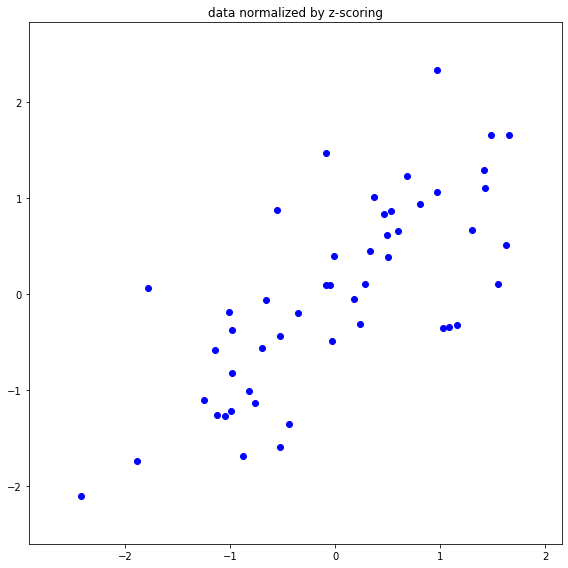

**************************************************
## [RESULT 02]
**************************************************


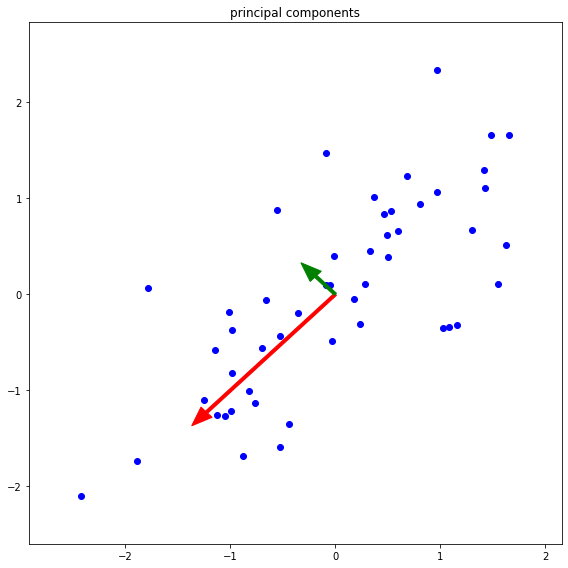

**************************************************
## [RESULT 03]
**************************************************


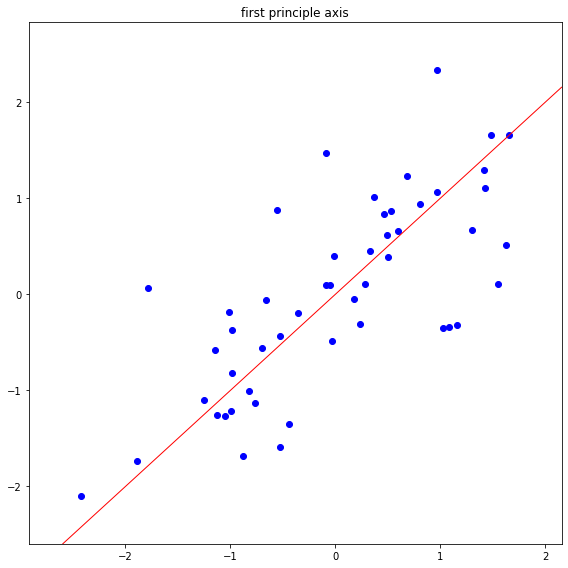

**************************************************
## [RESULT 04]
**************************************************


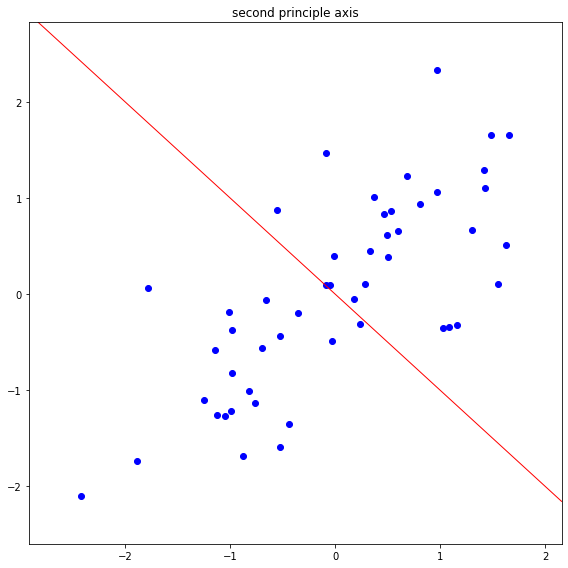

**************************************************
## [RESULT 05]
**************************************************


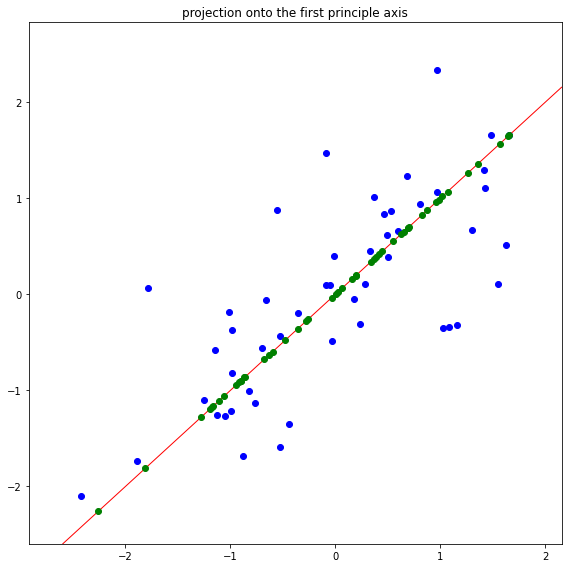

**************************************************
## [RESULT 06]
**************************************************


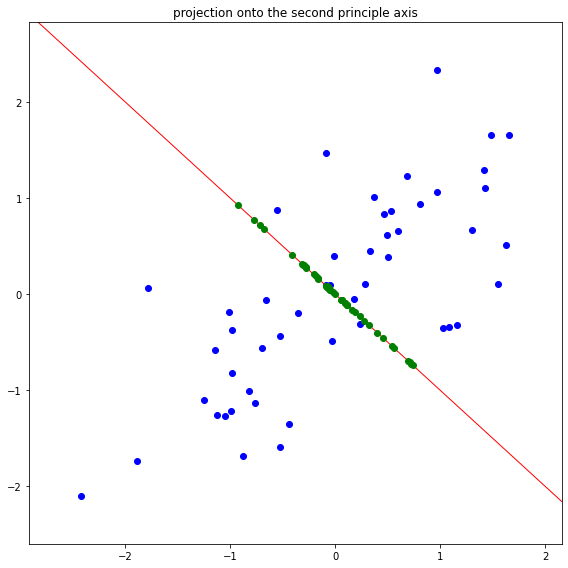

**************************************************
## [RESULT 07]
**************************************************


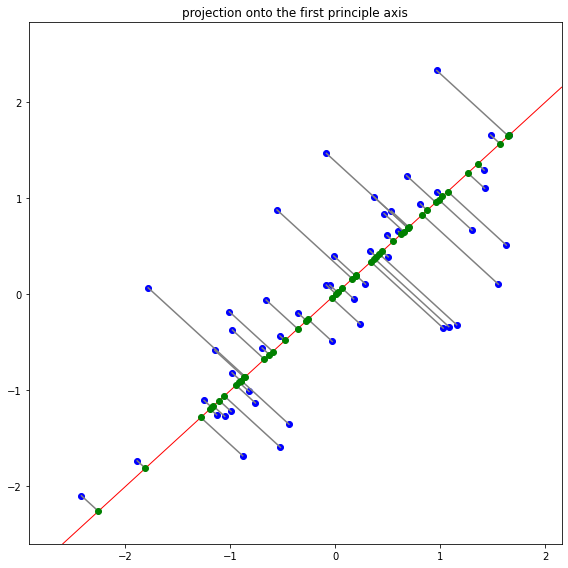

**************************************************
## [RESULT 08]
**************************************************


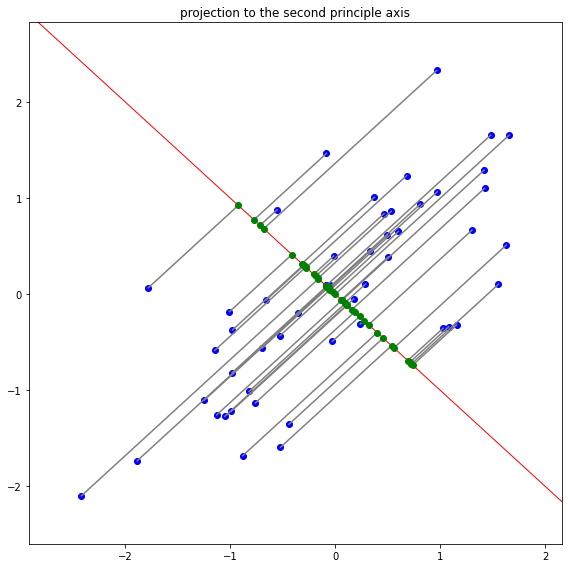

In [209]:
number_result = 8
for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)